## Final Project Submission

Please fill out:
* Student name: Guofa Shou
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Jeff Herman
* Blog post URL:


## The code is prepared for the project:
Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They have hired you to help them better understand the movie industry. Your team is charged with doing data analysis and creating a presentation that explores what type of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the CEO can use when deciding what type of films they should be creating.

Loading the data provided in zippedData from several mainstream moive-related sources, and get familiar about the information in each file

In [172]:
# Imported necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [173]:
# get the files in the zippedData folder
import os
def get_sorted_files(Directory):
    filenamelist = []
    for root, dirs, files in os.walk(Directory):
        for name in files:
            fullname = os.path.join(root, name)
            filenamelist.append(fullname)
    return sorted(filenamelist)

moiveFileList = get_sorted_files("zippedData")
print ("Number of items in the moiveFileList = ", len(moiveFileList))
ii = 0
for moivefile in moiveFileList:
    ii += 1
    print(str(ii) +':' + moivefile)
del ii

Number of items in the moiveFileList =  11
1:zippedData\bom.movie_gross.csv.gz
2:zippedData\imdb.name.basics.csv.gz
3:zippedData\imdb.title.akas.csv.gz
4:zippedData\imdb.title.basics.csv.gz
5:zippedData\imdb.title.crew.csv.gz
6:zippedData\imdb.title.principals.csv.gz
7:zippedData\imdb.title.ratings.csv.gz
8:zippedData\rt.movie_info.tsv.gz
9:zippedData\rt.reviews.tsv.gz
10:zippedData\tmdb.movies.csv.gz
11:zippedData\tn.movie_budgets.csv.gz


Summary of files in zippedData folder

There are 11 files in the zippedData folder and they are from five sources: bom, imdb, rt, tmdb, and tn.
Among them, bom,tmdb and tn have only one single file, imdb have 6 files and rt have 2 files

In [174]:
# Loading data from the files in the folder zippedData
# First use the file names to set the variable names
moiveVar = []
for moiveFile in moiveFileList:
    moivefilesplit = moiveFile.split(".")
    moivevartmp = ""
    for ii in range(len(moivefilesplit)-2):
        if ii == 0:
            moivevartmp += moivevartmp + moivefilesplit[ii]
        else:
            moivevartmp += moivevartmp + moivefilesplit[ii].title()
    moiveVar.append(moivevartmp.split("\\")[-1])
# get the variable names and check whether it is consistent with file names
for ii in range(len(moiveFileList)):    
    print(str(ii) + ':' + moiveVar[ii] + ' -- ' + moiveFileList[ii])

0:bomMovie_Gross -- zippedData\bom.movie_gross.csv.gz
1:imdbNameBasics -- zippedData\imdb.name.basics.csv.gz
2:imdbTitleAkas -- zippedData\imdb.title.akas.csv.gz
3:imdbTitleBasics -- zippedData\imdb.title.basics.csv.gz
4:imdbTitleCrew -- zippedData\imdb.title.crew.csv.gz
5:imdbTitlePrincipals -- zippedData\imdb.title.principals.csv.gz
6:imdbTitleRatings -- zippedData\imdb.title.ratings.csv.gz
7:rtMovie_Info -- zippedData\rt.movie_info.tsv.gz
8:rtReviews -- zippedData\rt.reviews.tsv.gz
9:tmdbMovies -- zippedData\tmdb.movies.csv.gz
10:tnMovie_Budgets -- zippedData\tn.movie_budgets.csv.gz


In [175]:
# load the data for each file
bomMovie_Gross = pd.read_csv(moiveFileList[0])
imdbNameBasics = pd.read_csv(moiveFileList[1])
imdbTitleAkas = pd.read_csv(moiveFileList[2])
imdbTitleBasics = pd.read_csv(moiveFileList[3])
imdbTitleCrew = pd.read_csv(moiveFileList[4])
imdbTitlePrincipals = pd.read_csv(moiveFileList[5])
imdbTitleRatings = pd.read_csv(moiveFileList[6])
rtMovie_Info = pd.read_csv(moiveFileList[7],encoding= 'unicode_escape',sep='\t')
rtReviews = pd.read_csv(moiveFileList[8], encoding= 'unicode_escape',sep='\t')
tmdbMovies = pd.read_csv(moiveFileList[9])
tnMovie_Budgets = pd.read_csv(moiveFileList[10])

In [176]:
# check the information for each one
# for bom: it has domestic_gross and foreign_gross data
bomMovie_Gross.info() # 3387 entries
bomMovie_Gross.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [177]:
# For imdb: it has averagerating in imdbTitleRatings
imdbNameBasics.info() #606648 entries
imdbNameBasics.head()
imdbTitleAkas.info() #606648 entries
imdbTitleAkas.head()
imdbTitleBasics.info()
imdbTitleBasics.head()
imdbTitleCrew.info() #606648 entries
imdbTitleCrew.head()
imdbTitlePrincipals.info() #606648 entries
imdbTitlePrincipals.head()
imdbTitleRatings.info() # 606648 entries, 8 columns
imdbTitleRatings.head()

# Get columns for five files
print('imdbNameBasics columns:',imdbNameBasics.columns)
print('imdbTitleAkas columns:',imdbTitleAkas.columns)
print('imdbTitleBasics columns:', imdbTitleBasics.columns)
print('imdbTitleCrew columns:',imdbTitleCrew.columns)
print('imdbTitlePrincipals columns:',imdbTitlePrincipals.columns)
print('imdbTitleRatings columns:',imdbTitleRatings.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non

In [178]:
# For RT: in rtMovie_Info, it has box_office for not all movies
#         in rtReviews, it has rating information
rtMovie_Info.info() # 5782 entries, 6 columns
rtMovie_Info.head()
# rtReviews.info() # 5782 entries, 8 columns
# rtReviews.head()
# get columns for both files
# print('rtMovie_Info columns:', rtMovie_Info.columns)
# print('rtReviews columns:', rtReviews.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [179]:
# For tmdb, it does not have box information but has the vote information
tmdbMovies.info() # 26517 entries, 10 columns
tmdbMovies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [180]:
# For rt, it has budget, domestic_gross and worldwide_gross 
tnMovie_Budgets.info() # 5782 entries
tnMovie_Budgets.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Based on the information obtained from each file above, there are two key types of information, i.e., gross/box data and voting/rating data, will be used to identify which categories will be suggested to be the focus of new studio in Microsoft.
gross/box data can be obtained from tnMoive,rtMovie_Info, or bomMovie_Gross
voting/rating data can be obtained from tmdbMovies, imdbTitleRatings, or rtReviews 

# Three questions:
## 1) What's the general performance of movie industry in terms of box office for recent years?
## 2) What types of films have large number of box office?
## 3) What types of films have good ratings?


## Question 1: What's the general performance of movie industry in terms of box office for recent years?
I am going to analyze the data from bomMovie_Gross and tnMovie_Budgets.

For bomMoive_Gross, I am going to plot the domestic and foreign gross for each year to check the trend for the moive industry


In [181]:
# take a look the summary of each column
bomMovie_Gross.info()
bomMovie_Gross.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


From the summary above, I observed:
1) There are 3387 total entries

2) domestic_gross only have 3359 entires, which means there are 3387-3359 NAN

3) foreign_gross only have 2037 entries, which means there are 3387-2037 NAN

4) foreign_gross is not in the type of float64 and need be converted to float64

In [182]:
# deal with foreign_gross
# convert string to float, however, it has errors since there are some values with ',', 
# therefore, firstly remove the ',' in the corresponding values
for ii in range(len(bomMovie_Gross.foreign_gross)):    
    strval = bomMovie_Gross.foreign_gross[ii]    
    if not isinstance(strval,float): 
        #print(str(ii) + ':' + strval)
        if len((strval)) > 0 :
            if "," in strval:
                print(str(ii) + ':' + strval)
                bomMovie_Gross.foreign_gross[ii] = strval.replace(",","")

1872:1,131.6
1873:1,019.4
1874:1,163.0
2760:1,010.0
3079:1,369.5


<ipython-input-182-ca3113c4e3af>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bomMovie_Gross.foreign_gross[ii] = strval.replace(",","")


In [183]:
# convert string to float and assign it for a new column
bomMovie_Gross['foreign_grossfloat'] = bomMovie_Gross.foreign_gross.map(lambda x: float(x))
bomMovie_Gross.info()
# add one more column for total gross
bomMovie_Gross['total_gross'] = bomMovie_Gross.foreign_grossfloat + bomMovie_Gross.domestic_gross
bomMovie_Gross.info()
# replace nan as 0 for each item
bomMovie_Gross['domestic_gross0'] = bomMovie_Gross['domestic_gross'].fillna(0)
bomMovie_Gross['foreign_grossfloat0'] = bomMovie_Gross['foreign_grossfloat'].fillna(0)
bomMovie_Gross['total_gross0'] = bomMovie_Gross['total_gross'].fillna(0)
bomMovie_Gross.info()
bomMovie_Gross['year'].unique()
# for sum of each year:2010-2018 (obtained from the unique)
bomMovie_Gross_yearsum = bomMovie_Gross.groupby(['year']).sum()
bomMovie_Gross_yearsum.info()
bomMovie_Gross_yearsum.head()
# it seems it is unnecessary to fillna, since the sum is same before and after
# for mean of each year, since every year the number of movies will be different
bomMovie_Gross_yearmean = bomMovie_Gross.groupby(['year']).mean()
print("*************** bomMovie_gross_yearmean *********")
bomMovie_Gross_yearmean.info()
bomMovie_Gross_yearmean.head()
# for mean, the values are different before and after replacing nan to zero, I will use the one before replacing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               3387 non-null   object 
 1   studio              3382 non-null   object 
 2   domestic_gross      3359 non-null   float64
 3   foreign_gross       2037 non-null   object 
 4   year                3387 non-null   int64  
 5   foreign_grossfloat  2037 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 158.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               3387 non-null   object 
 1   studio              3382 non-null   object 
 2   domestic_gross      3359 non-null   float64
 3   foreign_gross       2037 non-null   object 
 4   year                3387 non-null

,domestic_gross,foreign_grossfloat,total_gross,domestic_gross0,foreign_grossfloat0,total_gross0
year,,,,,,
2010,3.144559e+07,4.577789e+07,7.937058e+07,3.096624e+07,4.382396e+07,7.477290e+07
2011,2.535052e+07,5.348459e+07,8.791040e+07,2.522345e+07,3.927565e+07,6.411511e+07
2012,2.767584e+07,6.815155e+07,1.139953e+08,2.719151e+07,4.259472e+07,6.925212e+07
2013,3.128212e+07,8.103607e+07,1.356955e+08,3.083523e+07,4.746398e+07,7.754027e+07
2014,2.643923e+07,7.131079e+07,1.158318e+08,2.617149e+07,4.296701e+07,6.861937e+07


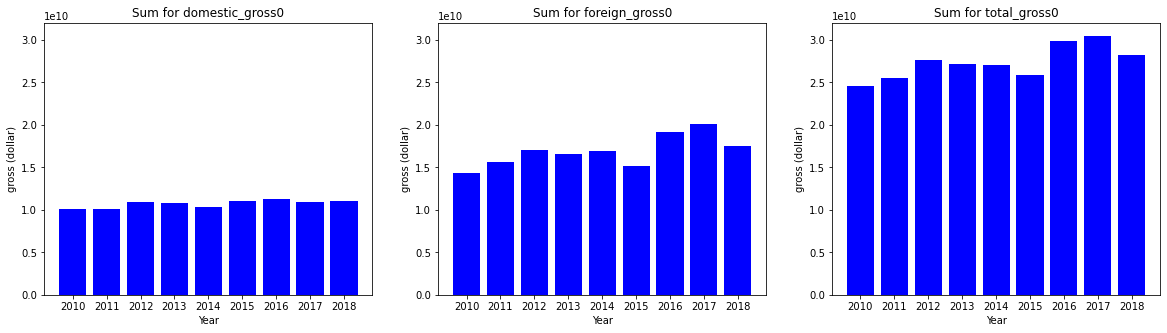

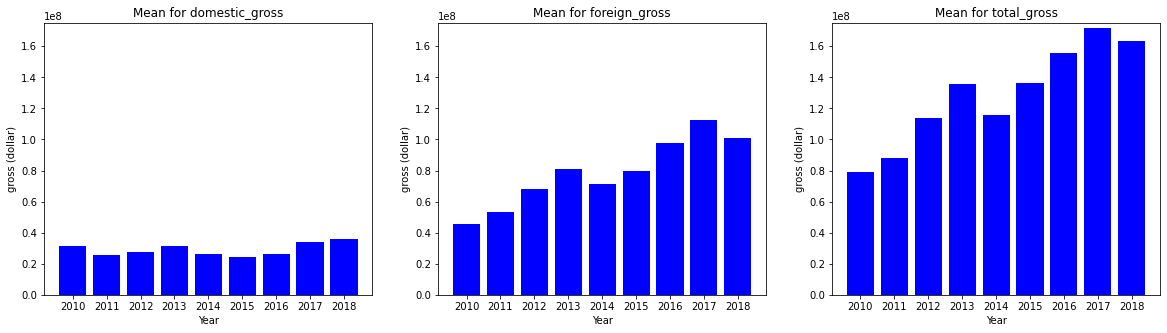

In [184]:
# barplot figure for the sum of three different types of gross, using the values before or after replacing are same
fig, (ax1, ax2, ax3)  = plt.subplots(1, 3, figsize = (20, 5))
ax1.bar(bomMovie_Gross_yearsum.index,bomMovie_Gross_yearsum['domestic_gross0'], color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('gross (dollar)')
ax1.set_title('Sum for domestic_gross0')
ax1.set_xticks(bomMovie_Gross_yearsum.index) 
ax1.set_ylim([0,3.2e10])
ax2.bar(bomMovie_Gross_yearsum.index,bomMovie_Gross_yearsum['foreign_grossfloat0'], color='blue')
ax2.set_xlabel('Year')
ax2.set_ylabel('gross (dollar)')
ax2.set_title('Sum for foreign_gross0')
ax2.set_xticks(bomMovie_Gross_yearsum.index) 
ax2.set_ylim([0,3.2e10])
ax3.bar(bomMovie_Gross_yearsum.index,bomMovie_Gross_yearsum['total_gross0'], color='blue')
ax3.set_xlabel('Year')
ax3.set_ylabel('gross (dollar)')
ax3.set_title('Sum for total_gross0')
ax3.set_xticks(bomMovie_Gross_yearsum.index) 
ax3.set_ylim([0,3.2e10])
plt.show()

# barplot figure for the mean of three different types of gross, will use the values before repalcing
fig, (ax1, ax2, ax3)  = plt.subplots(1, 3, figsize = (20, 5))
ax1.bar(bomMovie_Gross_yearmean.index,bomMovie_Gross_yearmean['domestic_gross'], color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('gross (dollar)')
ax1.set_title('Mean for domestic_gross')
ax1.set_xticks(bomMovie_Gross_yearmean.index) 
ax1.set_ylim([0,1.75e8])
ax2.bar(bomMovie_Gross_yearmean.index,bomMovie_Gross_yearmean['foreign_grossfloat'], color='blue')
ax2.set_xlabel('Year')
ax2.set_ylabel('gross (dollar)')
ax2.set_title('Mean for foreign_gross')
ax2.set_xticks(bomMovie_Gross_yearmean.index) 
ax2.set_ylim([0,1.75e8])
ax3.bar(bomMovie_Gross_yearmean.index,bomMovie_Gross_yearmean['total_gross'], color='blue')
ax3.set_xlabel('Year')
ax3.set_ylabel('gross (dollar)')
ax3.set_title('Mean for total_gross')
ax3.set_xticks(bomMovie_Gross_yearmean.index) 
ax3.set_ylim([0,1.75e8])

plt.show()

Observations from figures of the sum and mean values:

1) From figures of sum values:
    a. the domestic gross is quite stable, while foreign gross has an increased trend
    b. the foreign gross has around 1.5 times as compared to domestic gross, thus the trend in total gross is similar as   foreign gross
    
2) From figures of mean values:
    a. there are increased trend in both domestic and foreign gross, while the slope is much high in foreign gross
    b. again the mean values for each moive are around 2 times higher in foreign gross than in domestic gross, thus the trend in total gross is similar as foreign gross

In [185]:
# look the data from tnMovie_Budgets, which has the unique information regarding budgets, 
# which is also important if profit rather than gross will be examined
tnMovie_Budgets.info()
tnMovie_Budgets.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


1) tnMovie_Budgets have all the values for each entry but need to convert the values from string to float for production_budget, domestic_gross, and worldwide_gross

2) need to extract year from release_date if I want to examine year values

In [186]:
# convert string to float and assign it for a new column, again it need to remove ',' and '$'
# find a new way to do it                
tnMovie_Budgets['production_budgetpure'] = tnMovie_Budgets['production_budget'].str.replace(r'\D', '').astype('float')
tnMovie_Budgets['domestic_grosspure'] = tnMovie_Budgets['domestic_gross'].str.replace(r'\D', '').astype('float')
tnMovie_Budgets['worldwide_grosspure'] = tnMovie_Budgets['worldwide_gross'].str.replace(r'\D', '').astype('float')
tnMovie_Budgets.head()

# get year from release_data
tnMovie_Budgets['release_year'] = pd.DatetimeIndex(tnMovie_Budgets['release_date']).year
tnMovie_Budgets.head()
tnMovie_Budgets['release_year'].unique()

# calculate domestic profit and worldwide profit and also the rate
tnMovie_Budgets['domestic_profit'] = tnMovie_Budgets['domestic_grosspure'] - tnMovie_Budgets['production_budgetpure']
tnMovie_Budgets['worldwide_profit'] = tnMovie_Budgets['worldwide_grosspure'] - tnMovie_Budgets['production_budgetpure']
tnMovie_Budgets['domestic_profit_perc'] = tnMovie_Budgets['domestic_profit'] / tnMovie_Budgets['production_budgetpure'] * 100
tnMovie_Budgets['worldwide_profit_perc'] = tnMovie_Budgets['worldwide_profit'] / tnMovie_Budgets['production_budgetpure'] * 100

# calculate sum and mean for year, of course, the movies released early will be watched more time and usually it may have more gross and profit
tnMovie_Budgets_sum = tnMovie_Budgets.groupby(['release_year']).sum()
tnMovie_Budgets_sum.info()
tnMovie_Budgets_sum.head()
tnMovie_Budgets_mean = tnMovie_Budgets.groupby(['release_year']).mean()
tnMovie_Budgets_mean.info()
tnMovie_Budgets_mean.tail(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 1915 to 2020
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     96 non-null     int64  
 1   production_budgetpure  96 non-null     float64
 2   domestic_grosspure     96 non-null     float64
 3   worldwide_grosspure    96 non-null     float64
 4   domestic_profit        96 non-null     float64
 5   worldwide_profit       96 non-null     float64
 6   domestic_profit_perc   96 non-null     float64
 7   worldwide_profit_perc  96 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 6.8 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 1915 to 2020
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     96 non-null     float64
 1   production_budgetpure  96 non-null     float64
 2   dom

,id,production_budgetpure,domestic_grosspure,worldwide_grosspure,domestic_profit,worldwide_profit,domestic_profit_perc,worldwide_profit_perc
release_year,,,,,,,,
2011,52.141732,3.524784e+07,3.856479e+07,9.714671e+07,3.316945e+06,6.189887e+07,37.539407,184.356036
2012,51.336170,3.611547e+07,4.479053e+07,1.156729e+08,8.675062e+06,7.955740e+07,73.321547,276.968338
2013,49.701681,3.739238e+07,4.482367e+07,1.107553e+08,7.431285e+06,7.336290e+07,52.181485,200.467333
2014,49.188235,3.040552e+07,3.945958e+07,9.911344e+07,9.054059e+06,6.870792e+07,43.238553,177.583801
2015,51.260355,2.616029e+07,3.193948e+07,8.225145e+07,5.779185e+06,5.609115e+07,65.340606,230.559439
2016,49.643836,4.097370e+07,5.042387e+07,1.313614e+08,9.450175e+06,9.038773e+07,59.953680,242.603368
2017,51.422619,5.003073e+07,6.222259e+07,1.692240e+08,1.219186e+07,1.191933e+08,98.034956,313.691743
2018,53.286713,4.813886e+07,7.378870e+07,1.824786e+08,2.564984e+07,1.343398e+08,107.743407,294.593932
2019,51.791045,5.273896e+07,4.280029e+07,9.965411e+07,-9.938666e+06,4.691515e+07,22.481530,124.317629


In [187]:
tnMovie_Budgets_sum.index[-11:-1]

Int64Index([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype='int64', name='release_year')

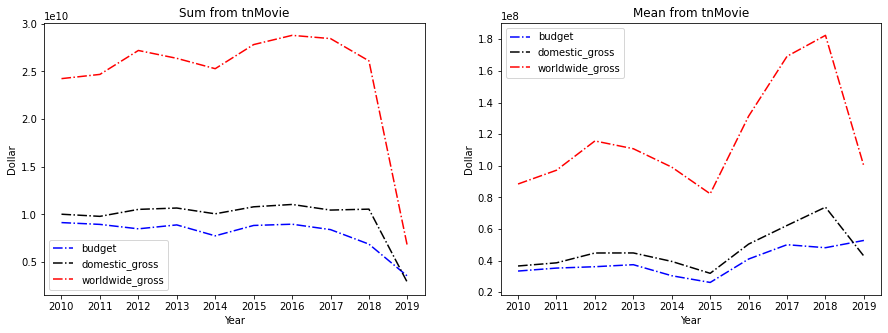

In [188]:
# To be consistent with the data from bomMovie_Gross, I only plot the data from 2010 to 2019, and plot both mean and sum for gross and profit
# 1) curve plot of sum and mean for budget, domestic_gross and worldwide_gross
fig, (ax1, ax2)  = plt.subplots(1, 2, figsize = (15, 5))
ax1.plot(tnMovie_Budgets_sum.index[-11:-1],tnMovie_Budgets_sum['production_budgetpure'][-11:-1], label = "budget",color = "blue",linestyle = "-.")
ax1.plot(tnMovie_Budgets_sum.index[-11:-1],tnMovie_Budgets_sum['domestic_grosspure'][-11:-1], label = "domestic_gross",color = "black",linestyle = "-.")
ax1.plot(tnMovie_Budgets_sum.index[-11:-1],tnMovie_Budgets_sum['worldwide_grosspure'][-11:-1], label = "worldwide_gross",color = "red",linestyle = "-.")
ax1.legend()
ax1.set_xlabel('Year')
ax1.set_ylabel('Dollar')
ax1.set_title('Sum from tnMovie')
ax1.set_xticks(tnMovie_Budgets_sum.index[-11:-1]) 

ax2.plot(tnMovie_Budgets_mean.index[-11:-1],tnMovie_Budgets_mean['production_budgetpure'][-11:-1], label = "budget",color = "blue",linestyle = "-.")
ax2.plot(tnMovie_Budgets_mean.index[-11:-1],tnMovie_Budgets_mean['domestic_grosspure'][-11:-1], label = "domestic_gross",color = "black",linestyle = "-.")
ax2.plot(tnMovie_Budgets_mean.index[-11:-1],tnMovie_Budgets_mean['worldwide_grosspure'][-11:-1], label = "worldwide_gross",color = "red",linestyle = "-.")
ax2.legend()
ax2.set_xlabel('Year')
ax2.set_ylabel('Dollar')
ax2.set_title('Mean from tnMovie')
ax2.set_xticks(tnMovie_Budgets_sum.index[-11:-1]) 


From sum values:
1) total budget is quite stable, but drops a lot in 2018 and 2019
2) domestic gross is also stable, but also drops a lot in 2018 and 2019
3) worldwide gross has the same observations as domestic gross
4) domestic gross always have larger values than budget, and worldwide gross is around 2.5 times than budget and domestic gross

From mean values:
1) all three have a increase and decrease pattern in two intervals: from 2010 to 2015, and 2015 to 2019

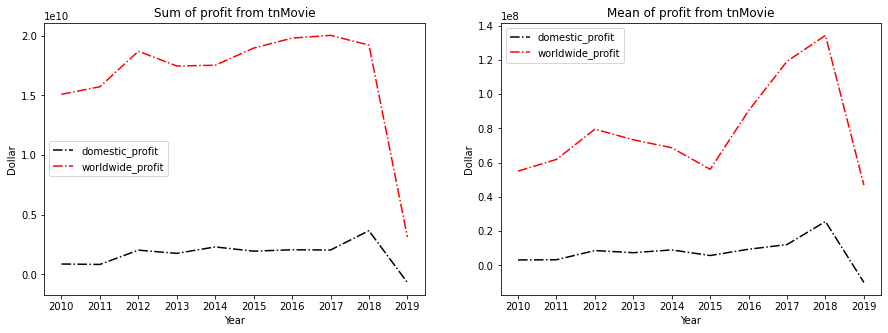

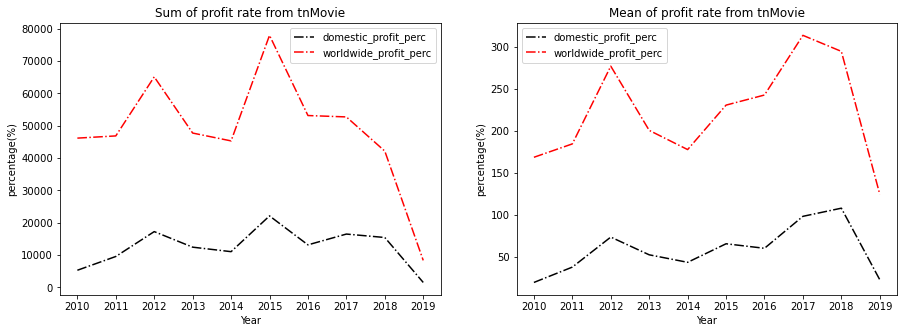

In [189]:
# 2) curve plot of sum and mean for profit and profit rate
fig, (ax1, ax2)  = plt.subplots(1, 2, figsize = (15, 5))
ax1.plot(tnMovie_Budgets_sum.index[-11:-1],tnMovie_Budgets_sum['domestic_profit'][-11:-1], label = "domestic_profit",color = "black",linestyle = "-.")
ax1.plot(tnMovie_Budgets_sum.index[-11:-1],tnMovie_Budgets_sum['worldwide_profit'][-11:-1], label = "worldwide_profit",color = "red",linestyle = "-.")
ax1.legend()
ax1.set_xlabel('Year')
ax1.set_ylabel('Dollar')
ax1.set_title('Sum of profit from tnMovie')
ax1.set_xticks(tnMovie_Budgets_sum.index[-11:-1]) 

ax2.plot(tnMovie_Budgets_mean.index[-11:-1],tnMovie_Budgets_mean['domestic_profit'][-11:-1], label = "domestic_profit",color = "black",linestyle = "-.")
ax2.plot(tnMovie_Budgets_mean.index[-11:-1],tnMovie_Budgets_mean['worldwide_profit'][-11:-1], label = "worldwide_profit",color = "red",linestyle = "-.")
ax2.legend()
ax2.set_xlabel('Year')
ax2.set_ylabel('Dollar')
ax2.set_title('Mean of profit from tnMovie')
ax2.set_xticks(tnMovie_Budgets_sum.index[-11:-1]) 

fig, (ax1, ax2)  = plt.subplots(1, 2, figsize = (15, 5))
ax1.plot(tnMovie_Budgets_sum.index[-11:-1],tnMovie_Budgets_sum['domestic_profit_perc'][-11:-1], label = "domestic_profit_perc",color = "black",linestyle = "-.")
ax1.plot(tnMovie_Budgets_sum.index[-11:-1],tnMovie_Budgets_sum['worldwide_profit_perc'][-11:-1], label = "worldwide_profit_perc",color = "red",linestyle = "-.")
ax1.legend()
ax1.set_xlabel('Year')
ax1.set_ylabel('percentage(%)')
ax1.set_title('Sum of profit rate from tnMovie')
ax1.set_xticks(tnMovie_Budgets_sum.index[-11:-1]) 

ax2.plot(tnMovie_Budgets_mean.index[-11:-1],tnMovie_Budgets_mean['domestic_profit_perc'][-11:-1], label = "domestic_profit_perc",color = "black",linestyle = "-.")
ax2.plot(tnMovie_Budgets_mean.index[-11:-1],tnMovie_Budgets_mean['worldwide_profit_perc'][-11:-1], label = "worldwide_profit_perc",color = "red",linestyle = "-.")
ax2.legend()
ax2.set_xlabel('Year')
ax2.set_ylabel('percentage(%)')
ax2.set_title('Mean of profit rate from tnMovie')
ax2.set_xticks(tnMovie_Budgets_sum.index[-11:-1]) 


From profit and profit rate figures, I only focused on the mean ones.
1) From mean profit, the domestic profit has an increased trend till 2018 and 2019, while worldwide profit has an increase and decrease pattern in two intervals: 2010-2015 and 2015-2019. Worldwide profit is much higher than domestic profit
2) From mean profit rate, both have an increase and decrease pattern in two intervals: 2010-2014 and 2014-2019. Worldwide profit rate  is much higher than domestic profit rate

For 2018 and 2019, lots of data probably still missing

## End of Question 1: What's the general performance of movie industry in terms of box office for recent years?

## Answer: the movie industy is still developing very well, and lots of profits could be achieved, especially from worldwide

-----------------------------

## Question 2: What types of films have large number of box office?

imdb and tnMovie_Budgets will be examined together since the first one has the information for movies categories, and the last one has the information for box office and budget

In [190]:
# refresh for imdb related files
# imdbNameBasics.info() #606648 entries
# imdbNameBasics.head()
# imdbTitleAkas.info() #606648 entries
# imdbTitleAkas.head()
imdbTitleBasics.info()
imdbTitleBasics.head()
# imdbTitleCrew.info() #606648 entries
# imdbTitleCrew.head()
# imdbTitlePrincipals.info() #606648 entries
# imdbTitlePrincipals.head()
# imdbTitleRatings.info() # 606648 entries, 8 columns
# imdbTitleRatings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


From imdbTitleBasics, it has the genres columns indicating the categories of the movie and one movie might have more than one types. In addtion, there are also 146144-140736 movies have Null in genres. Therefore, I will only get the movies with the genres information

In [191]:
imdbTitleBasicsWithGenres = imdbTitleBasics[pd.isna(imdbTitleBasics['genres']) == False]
imdbTitleBasicsWithGenres.info()
imdbTitleBasicsWithGenres.head()
imdbTitleBasicsWithGenres['start_year'].unique()
# only select movies released between 2010 and 2019
imdbTitleBasicsWithGenres = imdbTitleBasicsWithGenres[(imdbTitleBasicsWithGenres['start_year'] >= 2010) & (imdbTitleBasicsWithGenres['start_year'] <= 2019)]
imdbTitleBasicsWithGenres.info()
imdbTitleBasicsWithGenres.head()
imdbTitleBasicsWithGenres['start_year'].unique()
imdbTitleBasicsWithGenres.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140736 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           140736 non-null  object 
 1   primary_title    140736 non-null  object 
 2   original_title   140734 non-null  object 
 3   start_year       140736 non-null  int64  
 4   runtime_minutes  112233 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.5+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 139722 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           139722 non-null  object 
 1   primary_title    139722 non-null  object 
 2   original_title   139720 non-null  object 
 3   start_year       139722 non-null  int64  
 4   runtime_minutes  112145 non-null  float64
 5   genres  

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [192]:
# combining gross data from tnMoive_Budgets and genres information from imdbTitleBasicsWithGenres based on the movie name
# To do so,I will use SQL in pandas
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

# select primary_title, original_title, start_year, and genres from imdbTitleBasicsWithGenres,
# and production_budgetpure, domestic_grosspure, worldwide_grosspure, and their profit and profit rate from tnMoive_Budgets

q1 = """SELECT
        imdb.genres, imdb.start_year, tnm.movie,
        tnm.production_budgetpure, tnm.domestic_grosspure, tnm.worldwide_grosspure,
        tnm.domestic_profit, tnm.worldwide_profit, tnm.domestic_profit_perc, tnm.worldwide_profit_perc
     FROM
        imdbTitleBasicsWithGenres imdb
     INNER JOIN
        tnMovie_Budgets tnm
           ON (imdb.primary_title = tnm.movie or imdb.original_title = tnm.movie ) 
           and imdb.start_year = tnm.release_year
     ORDER bY worldwide_profit desc;"""
imdbTitleGenrestnMovieJoin = pysqldf(q1)

In [193]:
imdbTitleGenrestnMovieJoin.info()
imdbTitleGenrestnMovieJoin.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571 entries, 0 to 1570
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   genres                 1571 non-null   object 
 1   start_year             1571 non-null   int64  
 2   movie                  1571 non-null   object 
 3   production_budgetpure  1571 non-null   float64
 4   domestic_grosspure     1571 non-null   float64
 5   worldwide_grosspure    1571 non-null   float64
 6   domestic_profit        1571 non-null   float64
 7   worldwide_profit       1571 non-null   float64
 8   domestic_profit_perc   1571 non-null   float64
 9   worldwide_profit_perc  1571 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 122.9+ KB


,genres,start_year,movie,production_budgetpure,domestic_grosspure,worldwide_grosspure,domestic_profit,worldwide_profit,domestic_profit_perc,worldwide_profit_perc
0,"Action,Adventure,Sci-Fi",2018,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,378815482.0,1.748134e+09,126.271827,582.711400
1,"Action,Adventure,Sci-Fi",2015,Jurassic World,215000000.0,652270625.0,1.648855e+09,437270625.0,1.433855e+09,203.381686,666.909239
2,"Action,Crime,Thriller",2015,Furious 7,190000000.0,353007020.0,1.518723e+09,163007020.0,1.328723e+09,85.793168,699.327786
3,"Action,Adventure,Sci-Fi",2012,The Avengers,225000000.0,623279547.0,1.517936e+09,398279547.0,1.292936e+09,177.013132,574.638176
4,"Action,Adventure,Sci-Fi",2018,Black Panther,200000000.0,700059566.0,1.348258e+09,500059566.0,1.148258e+09,250.029783,574.129112
5,"Action,Adventure,Sci-Fi",2018,Jurassic World: Fallen Kingdom,170000000.0,417719760.0,1.305773e+09,247719760.0,1.135773e+09,145.717506,668.101646
6,"Adventure,Animation,Comedy",2013,Frozen,150000000.0,400738009.0,1.272470e+09,250738009.0,1.122470e+09,167.158673,748.313273
7,"Family,Fantasy,Musical",2017,Beauty and the Beast,160000000.0,504014165.0,1.259200e+09,344014165.0,1.099200e+09,215.008853,686.999816
8,"Adventure,Animation,Comedy",2015,Minions,74000000.0,336045770.0,1.160336e+09,262045770.0,1.086336e+09,354.115905,1468.021855
9,"Action,Adventure,Sci-Fi",2015,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,128405868.0,1.072414e+09,38.840250,324.384139


I found there are repeated movies, e.g., Frozen in 2010 and 2013, in the first code, therefore, double check the original data

In [194]:
# tnMovie_Budgets.head()
tnMovie_BudgetsFrozen = tnMovie_Budgets[tnMovie_Budgets['movie'] == 'Frozen']
tnMovie_BudgetsFrozen.info()
tnMovie_BudgetsFrozen.head()
# imdbTitleBasicsWithGenres.head()
# imdbTitleBasicsWithGenresFrozen = imdbTitleBasicsWithGenres[imdbTitleBasicsWithGenres['primary_title'] == 'Frozen']
# imdbTitleBasicsWithGenresFrozen.info()
# imdbTitleBasicsWithGenresFrozen.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 155 to 155
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1 non-null      int64  
 1   release_date           1 non-null      object 
 2   movie                  1 non-null      object 
 3   production_budget      1 non-null      object 
 4   domestic_gross         1 non-null      object 
 5   worldwide_gross        1 non-null      object 
 6   production_budgetpure  1 non-null      float64
 7   domestic_grosspure     1 non-null      float64
 8   worldwide_grosspure    1 non-null      float64
 9   release_year           1 non-null      int64  
 10  domestic_profit        1 non-null      float64
 11  worldwide_profit       1 non-null      float64
 12  domestic_profit_perc   1 non-null      float64
 13  worldwide_profit_perc  1 non-null      float64
dtypes: float64(7), int64(2), object(5)
memory usage: 120.0+ by

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budgetpure,domestic_grosspure,worldwide_grosspure,release_year,domestic_profit,worldwide_profit,domestic_profit_perc,worldwide_profit_perc
155,56,"Nov 22, 2013",Frozen,"$150,000,000","$400,738,009","$1,272,469,910",150000000.0,400738009.0,1.272470e+09,2013,250738009.0,1.122470e+09,167.158673,748.313273


I changed the query code and now the results are correct, and I have 1571 movies between 2010 to 2019 to check which categories of movies have more profit in each year, and how many of them released in each year

In [195]:
imdbTitleGenrestnMovieJoin.info()
imdbTitleGenrestnMovieJoin.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571 entries, 0 to 1570
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   genres                 1571 non-null   object 
 1   start_year             1571 non-null   int64  
 2   movie                  1571 non-null   object 
 3   production_budgetpure  1571 non-null   float64
 4   domestic_grosspure     1571 non-null   float64
 5   worldwide_grosspure    1571 non-null   float64
 6   domestic_profit        1571 non-null   float64
 7   worldwide_profit       1571 non-null   float64
 8   domestic_profit_perc   1571 non-null   float64
 9   worldwide_profit_perc  1571 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 122.9+ KB


,genres,start_year,movie,production_budgetpure,domestic_grosspure,worldwide_grosspure,domestic_profit,worldwide_profit,domestic_profit_perc,worldwide_profit_perc
0,"Action,Adventure,Sci-Fi",2018,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,378815482.0,1.748134e+09,126.271827,582.711400
1,"Action,Adventure,Sci-Fi",2015,Jurassic World,215000000.0,652270625.0,1.648855e+09,437270625.0,1.433855e+09,203.381686,666.909239
2,"Action,Crime,Thriller",2015,Furious 7,190000000.0,353007020.0,1.518723e+09,163007020.0,1.328723e+09,85.793168,699.327786
3,"Action,Adventure,Sci-Fi",2012,The Avengers,225000000.0,623279547.0,1.517936e+09,398279547.0,1.292936e+09,177.013132,574.638176
4,"Action,Adventure,Sci-Fi",2018,Black Panther,200000000.0,700059566.0,1.348258e+09,500059566.0,1.148258e+09,250.029783,574.129112
5,"Action,Adventure,Sci-Fi",2018,Jurassic World: Fallen Kingdom,170000000.0,417719760.0,1.305773e+09,247719760.0,1.135773e+09,145.717506,668.101646
6,"Adventure,Animation,Comedy",2013,Frozen,150000000.0,400738009.0,1.272470e+09,250738009.0,1.122470e+09,167.158673,748.313273
7,"Family,Fantasy,Musical",2017,Beauty and the Beast,160000000.0,504014165.0,1.259200e+09,344014165.0,1.099200e+09,215.008853,686.999816
8,"Adventure,Animation,Comedy",2015,Minions,74000000.0,336045770.0,1.160336e+09,262045770.0,1.086336e+09,354.115905,1468.021855
9,"Action,Adventure,Sci-Fi",2015,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,128405868.0,1.072414e+09,38.840250,324.384139


In [196]:
# since many movies have more than one types of genres, I need to split it
df = imdbTitleGenrestnMovieJoin
df.head()
df['genres'] = df['genres'].str.split(',')
df = df.explode('genres').reset_index(drop=True)
cols = list(df.columns)
cols.append(cols.pop(cols.index('movie')))
df = df[cols]
imdbTitleGenrestnMovieJoinInd = df
del df
imdbTitleGenrestnMovieJoinInd.info()
imdbTitleGenrestnMovieJoinInd.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3951 entries, 0 to 3950
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   genres                 3951 non-null   object 
 1   start_year             3951 non-null   int64  
 2   production_budgetpure  3951 non-null   float64
 3   domestic_grosspure     3951 non-null   float64
 4   worldwide_grosspure    3951 non-null   float64
 5   domestic_profit        3951 non-null   float64
 6   worldwide_profit       3951 non-null   float64
 7   domestic_profit_perc   3951 non-null   float64
 8   worldwide_profit_perc  3951 non-null   float64
 9   movie                  3951 non-null   object 
dtypes: float64(7), int64(1), object(2)
memory usage: 308.8+ KB


,genres,start_year,production_budgetpure,domestic_grosspure,worldwide_grosspure,domestic_profit,worldwide_profit,domestic_profit_perc,worldwide_profit_perc,movie
0,Action,2018,300000000.0,678815482.0,2.048134e+09,378815482.0,1.748134e+09,126.271827,582.711400,Avengers: Infinity War
1,Adventure,2018,300000000.0,678815482.0,2.048134e+09,378815482.0,1.748134e+09,126.271827,582.711400,Avengers: Infinity War
2,Sci-Fi,2018,300000000.0,678815482.0,2.048134e+09,378815482.0,1.748134e+09,126.271827,582.711400,Avengers: Infinity War
3,Action,2015,215000000.0,652270625.0,1.648855e+09,437270625.0,1.433855e+09,203.381686,666.909239,Jurassic World
4,Adventure,2015,215000000.0,652270625.0,1.648855e+09,437270625.0,1.433855e+09,203.381686,666.909239,Jurassic World


In [197]:
imdbTitleGenrestnMovieJoinInd.info()
imdbTitleGenrestnMovieJoinInd.tail(20)
# I noticed some movies have negative worldwide_profit, therefore,
# I may need to remove the ones that has zero value in worldwide_grosspure in the future

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3951 entries, 0 to 3950
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   genres                 3951 non-null   object 
 1   start_year             3951 non-null   int64  
 2   production_budgetpure  3951 non-null   float64
 3   domestic_grosspure     3951 non-null   float64
 4   worldwide_grosspure    3951 non-null   float64
 5   domestic_profit        3951 non-null   float64
 6   worldwide_profit       3951 non-null   float64
 7   domestic_profit_perc   3951 non-null   float64
 8   worldwide_profit_perc  3951 non-null   float64
 9   movie                  3951 non-null   object 
dtypes: float64(7), int64(1), object(2)
memory usage: 308.8+ KB


,genres,start_year,production_budgetpure,domestic_grosspure,worldwide_grosspure,domestic_profit,worldwide_profit,domestic_profit_perc,worldwide_profit_perc,movie
3931,Family,2010,90000000.0,195459.0,20466016.0,-89804541.0,-69533984.0,-99.782823,-77.259982,The Nutcracker in 3D
3932,Fantasy,2010,90000000.0,195459.0,20466016.0,-89804541.0,-69533984.0,-99.782823,-77.259982,The Nutcracker in 3D
3933,Drama,2017,90000000.0,8224288.0,10551417.0,-81775712.0,-79448583.0,-90.861902,-88.276203,The Promise
3934,Comedy,2017,90000000.0,8224288.0,10551417.0,-81775712.0,-79448583.0,-90.861902,-88.276203,The Promise
3935,Drama,2017,90000000.0,8224288.0,10551417.0,-81775712.0,-79448583.0,-90.861902,-88.276203,The Promise
3936,Horror,2017,90000000.0,8224288.0,10551417.0,-81775712.0,-79448583.0,-90.861902,-88.276203,The Promise
3937,Thriller,2017,90000000.0,8224288.0,10551417.0,-81775712.0,-79448583.0,-90.861902,-88.276203,The Promise
3938,Drama,2017,90000000.0,8224288.0,10551417.0,-81775712.0,-79448583.0,-90.861902,-88.276203,The Promise
3939,Action,2017,90000000.0,0.0,0.0,-90000000.0,-90000000.0,-100.000000,-100.000000,Bright
3940,Crime,2017,90000000.0,0.0,0.0,-90000000.0,-90000000.0,-100.000000,-100.000000,Bright


Do some summary and plots:
1) sum or mean of each category for each year

2) total number of movies for each category and each year

In [198]:
genress = imdbTitleGenrestnMovieJoinInd['genres'].unique()
years = imdbTitleGenrestnMovieJoinInd['start_year'].unique()
# years = sort(years)
years.sort()
print(years)
# imdbgenresyear = imdbTitleGenrestnMovieJoinInd[(imdbTitleGenrestnMovieJoinInd['genres'] == genress[0]) & (imdbTitleGenrestnMovieJoinInd['start_year'] == years[0]) ]
# imdbgenresyear.info()
# len(imdbgenresyear)


[2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]


In [199]:
from statistics import mean
listgenres = []
listyear = []
listnomovies = []
listwwprofitsum = []
listwwprofitmean = []

for genres in genress:
    for year in years:
#         print('genres = ' + genres + ', year = ' + str(year))
        listgenres.append(genres)
        listyear.append(year)        
        imdbgenresyear = imdbTitleGenrestnMovieJoinInd[(imdbTitleGenrestnMovieJoinInd['genres'] == genres) & (imdbTitleGenrestnMovieJoinInd['start_year'] == year) ]
#         print(imdbgenresyear.head())
        imdbgenreswwprofit = imdbgenresyear['worldwide_profit']
#         print(imdbgenreswwprofit)        
        listnomovies.append(len(imdbgenresyear))
        listwwprofitsum.append(sum(imdbgenreswwprofit))
        if len(imdbgenresyear) > 1:
            listwwprofitmean.append(mean(imdbgenreswwprofit))
        else:
            listwwprofitmean.append(0)                
        del imdbgenresyear,imdbgenreswwprofit

In [200]:
# listyear
data = {'genres': listgenres,
        'year': listyear,
        'nomovies': listnomovies,
        'worldwideprofitsum': listwwprofitsum,
        'worldwideprofitmean':listwwprofitmean}
genresyearsum = pd.DataFrame(data)
del data
genresyearsum.info()
genresyearsum.head(20)
# len(genresyearsum.genres.unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   genres               220 non-null    object 
 1   year                 220 non-null    int64  
 2   nomovies             220 non-null    int64  
 3   worldwideprofitsum   220 non-null    float64
 4   worldwideprofitmean  220 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 8.7+ KB


,genres,year,nomovies,worldwideprofitsum,worldwideprofitmean
0,Action,2010,48,4.418963e+09,9.206174e+07
1,Action,2011,50,6.044774e+09,1.208955e+08
2,Action,2012,45,7.392425e+09,1.642761e+08
3,Action,2013,47,6.269770e+09,1.333994e+08
4,Action,2014,56,1.103460e+10,1.970464e+08
5,Action,2015,58,7.258649e+09,1.251491e+08
6,Action,2016,57,8.061890e+09,1.414367e+08
7,Action,2017,37,8.890198e+09,2.402756e+08
8,Action,2018,45,1.092058e+10,2.426795e+08
9,Action,2019,15,1.478470e+09,9.856469e+07


Now I have get the data for worldwideprofit for different types of movies between 2010 to 2019. In the following, I will plot them using bar plot for nomovies, worldwideprofitsum,worldwideprofitmean

In [201]:
# there are 22 categories in genres, 10 years(2010-2019), three metrics: nomovies, worldwideprofitsum,worldwideprofitmean
# for each metric, I will plot 22 categories into 2 plots, with x axis as year
# convert pandas from long to wide for the sake of subsequent ploting
genresyearsumtmp = genresyearsum.pivot_table(index=['year'],columns='genres',aggfunc='mean') #set_index(['year']).unstack()
genresyearsumtmp.columns = genresyearsumtmp.columns.map(lambda x: '{}_{}'.format(x[0], x[1]))
genresyearsumtmp = genresyearsumtmp.reset_index()
genresyearsumtmp.head(10)
  

,year,nomovies_Action,nomovies_Adventure,nomovies_Animation,nomovies_Biography,nomovies_Comedy,nomovies_Crime,nomovies_Documentary,nomovies_Drama,nomovies_Family,...,worldwideprofitsum_Music,worldwideprofitsum_Musical,worldwideprofitsum_Mystery,worldwideprofitsum_Reality-TV,worldwideprofitsum_Romance,worldwideprofitsum_Sci-Fi,worldwideprofitsum_Sport,worldwideprofitsum_Thriller,worldwideprofitsum_War,worldwideprofitsum_Western
0,2010,48,36,11,9,76,26,6,86,23,...,296957234.0,8.559756e+08,6.115731e+08,0.0,1.783399e+09,1.288557e+09,128130053.0,1.650348e+09,126271852.0,183791253.0
1,2011,50,37,14,10,67,22,5,87,11,...,133486357.0,0.000000e+00,1.575563e+09,0.0,1.404155e+09,2.353984e+09,57056842.0,1.842716e+09,42924312.0,-3282693.0
2,2012,45,33,11,6,67,25,4,75,8,...,323441328.0,-1.096563e+07,7.161836e+08,0.0,1.134544e+09,3.088358e+09,7173436.0,3.644625e+09,-1973745.0,352395275.0
3,2013,47,42,12,15,53,33,7,93,11,...,-2798605.0,4.252747e+07,6.788711e+08,0.0,4.263831e+08,4.239646e+09,96830565.0,2.201247e+09,47260183.0,-14997885.0
4,2014,56,40,11,19,56,32,14,97,11,...,144103501.0,-1.000000e+06,1.531583e+09,0.0,1.018782e+09,5.225140e+09,132281313.0,2.173150e+09,350196785.0,-11022733.0
5,2015,58,40,9,20,66,36,9,105,10,...,474225610.0,0.000000e+00,5.103647e+08,0.0,7.609261e+08,4.174384e+09,259831733.0,3.209626e+09,-5848011.0,-60000000.0
6,2016,57,45,14,23,53,22,5,80,9,...,438048963.0,0.000000e+00,7.051566e+08,-1000000.0,5.310205e+08,2.929863e+09,59395053.0,8.761671e+08,-19523376.0,72525156.0
7,2017,37,32,12,15,38,15,6,65,3,...,151084357.0,1.401865e+09,1.306817e+09,0.0,3.994819e+08,2.048682e+09,0.0,3.056006e+09,-30408522.0,0.0
8,2018,45,38,8,17,37,25,1,54,8,...,849492523.0,0.000000e+00,3.633662e+08,0.0,9.835187e+08,7.061497e+09,192118683.0,2.497988e+09,888305.0,0.0
9,2019,15,15,4,5,11,3,0,16,3,...,67642725.0,0.000000e+00,2.516911e+08,0.0,1.271274e+08,1.176464e+09,0.0,4.577980e+08,0.0,0.0


['Action' 'Adventure' 'Sci-Fi' 'Crime' 'Thriller' 'Animation' 'Comedy'
 'Family' 'Fantasy' 'Musical' 'Biography' 'Drama' 'Music' 'Horror'
 'Romance' 'Mystery' 'Western' 'History' 'Documentary' 'War' 'Sport'
 'Reality-TV']


Text(0.5, 1.0, 'number of movies for 22 genres part 2')

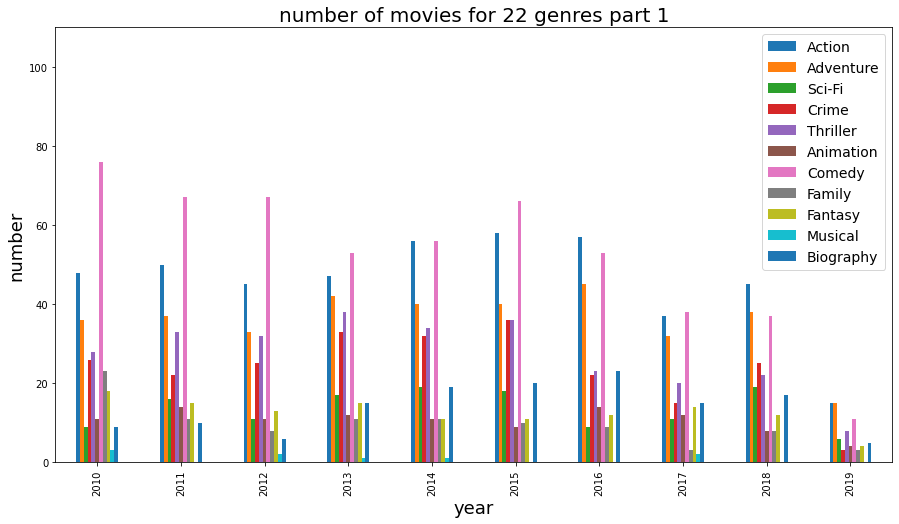

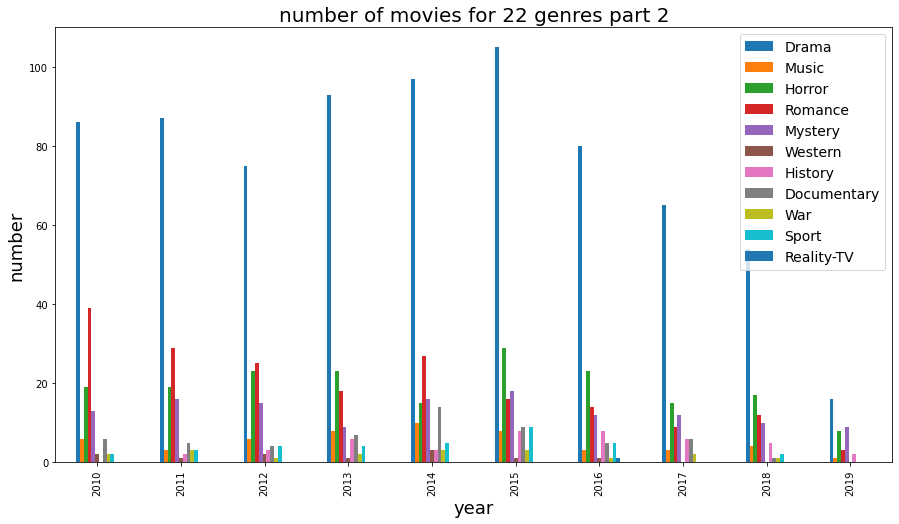

In [202]:
genrestmp  = genresyearsum['genres'].unique()
print(genrestmp)
# 1) nomoives
nomoviescols = []
for ii in range(11):
    nomoviescols.append("nomovies_"+genrestmp[ii])
ax = genresyearsumtmp.plot( x = "year", y =nomoviescols, kind="bar",figsize=(15,8))
ax.set_ylabel('number',fontsize=18)
ax.set_xlabel('year',fontsize=18)
ax.set_ylim([0,110])
ax.legend(genrestmp[0:11],fontsize=14)
ax.set_title('number of movies for 22 genres part 1',fontsize=20)
nomoviescols = []
for ii in range(11):
    nomoviescols.append("nomovies_"+genrestmp[ii+11])
ax = genresyearsumtmp.plot( x = "year", y =nomoviescols, kind="bar",figsize=(15,8))
ax.set_ylabel('number',fontsize=18)
ax.set_xlabel('year',fontsize=18)
ax.set_ylim([0,110])
ax.legend(genrestmp[11:22],fontsize=14)
ax.set_title('number of movies for 22 genres part 2',fontsize=20)

Text(0.5, 1.0, 'number of movies for selected genres with high numbers')

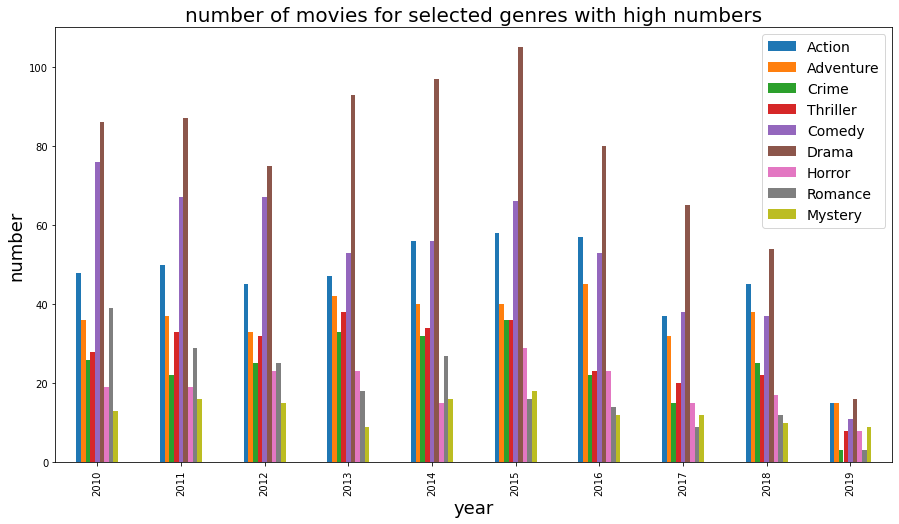

In [203]:
# From above figures for number of movies released each year for different categories,
# 'Action','Adventure','Crime','Thriller','Comedy', 'Drama', 'Horror', 'Romance',and 'Mystery',
# have more released, therefore, plot these categories in a single figure
genrestsel = [ 'Action','Adventure','Crime','Thriller','Comedy', 'Drama', 'Horror', 'Romance', 'Mystery']
nomoviescols = []
for ii in range(len(genrestsel)):
    nomoviescols.append("nomovies_"+genrestsel[ii])
ax = genresyearsumtmp.plot( x = "year", y =nomoviescols, kind="bar",figsize=(15,8))
ax.set_ylabel('number',fontsize=18)
ax.set_xlabel('year',fontsize=18)
ax.set_ylim([0,110])
ax.legend(genrestsel,fontsize=14)
ax.set_title('number of movies for selected genres with high numbers',fontsize=20)

From the above figure, Drama, Comedy, Action,Adventure are the top four categories in terms of number of movies released each year between 2010 and 2019

Text(0.5, 1.0, 'Sum of worldwideprofit for 22 genres part 2')

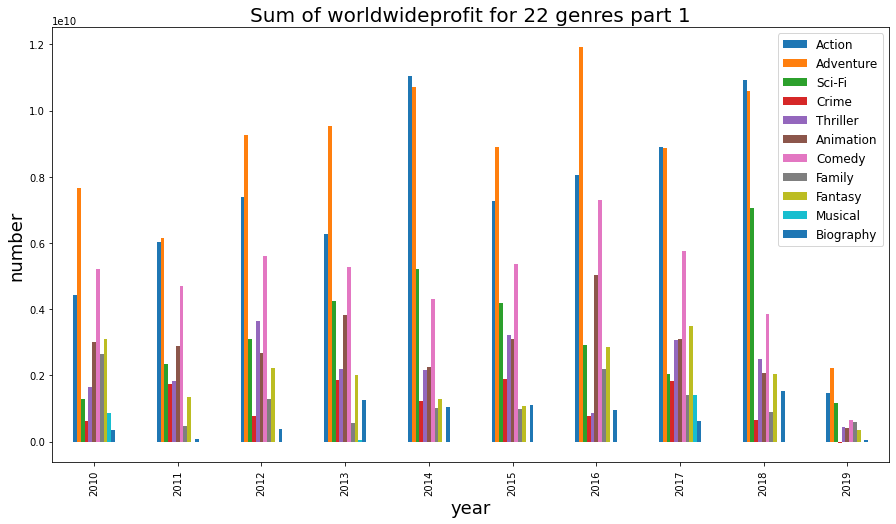

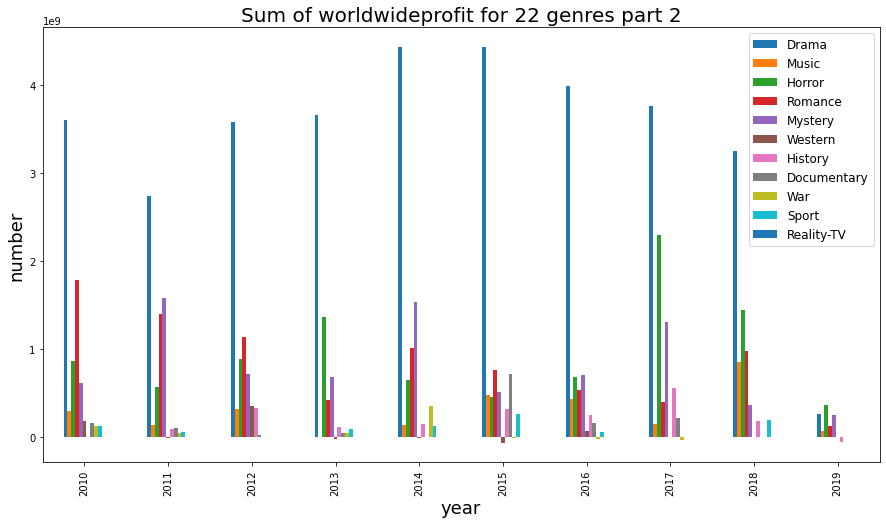

In [204]:
# 2) worldwideprofitsum
worldwideprofitsumcols = []
for ii in range(11):
    worldwideprofitsumcols.append("worldwideprofitsum_"+genrestmp[ii])
ax = genresyearsumtmp.plot( x = "year", y = worldwideprofitsumcols, kind="bar",figsize=(15,8))
ax.set_ylabel('number',fontsize=18)
ax.set_xlabel('year',fontsize=18)
# ax.set_ylim([0,110])
ax.legend(genrestmp[0:11],fontsize=12)
ax.set_title('Sum of worldwideprofit for 22 genres part 1',fontsize=20)

worldwideprofitsumcols = []
for ii in range(11):
    worldwideprofitsumcols.append("worldwideprofitsum_"+genrestmp[ii+11])
ax = genresyearsumtmp.plot( x = "year", y =worldwideprofitsumcols, kind="bar",figsize=(15,8))
ax.set_ylabel('number',fontsize=18)
ax.set_xlabel('year',fontsize=18)
# ax.set_ylim([0,110])
ax.legend(genrestmp[11:22],fontsize=12)
ax.set_title('Sum of worldwideprofit for 22 genres part 2',fontsize=20)

Text(0.5, 1.0, 'Sum of worldwideprofit for selected genres with high values')

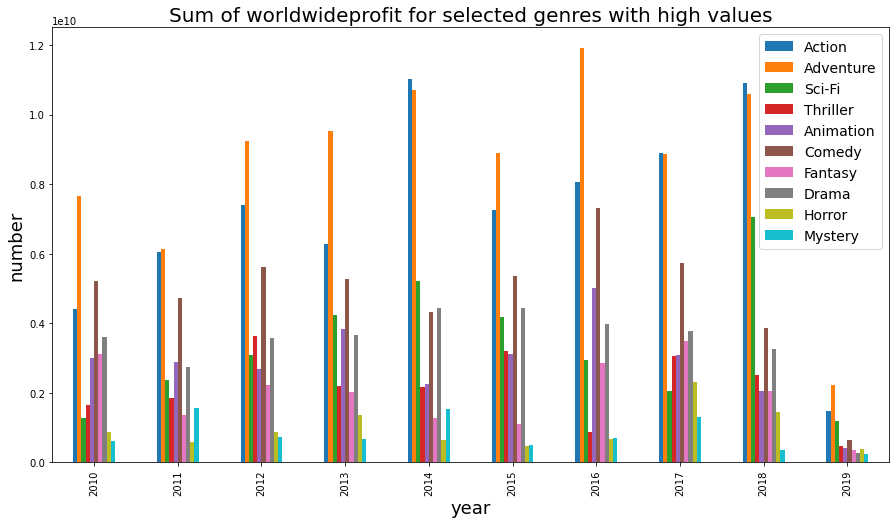

In [205]:
# From above figures,
#  'Action','Adventure','Sci-Fi','Thriller','Animation','Comedy', 'Fantasy','Drama', 'Horror', 'Mystery',
# have high profit, therefore, plot these categories in a single figure
genrestsel = [ 'Action','Adventure','Sci-Fi','Thriller','Animation','Comedy', 'Fantasy','Drama', 'Horror', 'Mystery']
worldwideprofitsumcols = []
for ii in range(len(genrestsel)):
    worldwideprofitsumcols.append("worldwideprofitsum_"+genrestsel[ii])
ax = genresyearsumtmp.plot( x = "year", y = worldwideprofitsumcols, kind="bar",figsize=(15,8))
ax.set_ylabel('number',fontsize=18)
ax.set_xlabel('year',fontsize=18)
# ax.set_ylim([0,110])
ax.legend(genrestsel,fontsize=14)
ax.set_title('Sum of worldwideprofit for selected genres with high values',fontsize=20)

From above figure, Adventure, Action, Comedy, and Sci-Fi, are the top 4 categories in terms of sum of worldwideprofit

Text(0.5, 1.0, 'Mean of worldwideprofit for selected genres')

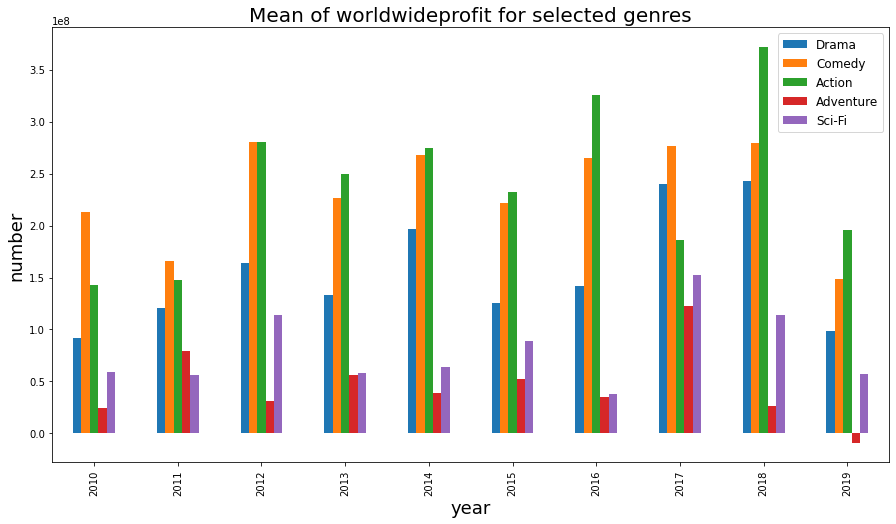

In [206]:
# 3) worldwideprofitmean: only examine values for Drama, Comedy, Action,Adventure,and Sci-Fi,
# based on the conclusions from nomovies and worldwideprofitsum
genrestsel = ['Drama', 'Comedy', 'Action', 'Adventure', 'Sci-Fi']
worldwideprofitmeancols = []
for ii in range(len(genrestsel)):
    worldwideprofitmeancols.append("worldwideprofitmean_"+genrestmp[ii])
ax = genresyearsumtmp.plot( x = "year", y = worldwideprofitmeancols, kind="bar",figsize=(15,8))
ax.set_ylabel('number',fontsize=18)
ax.set_xlabel('year',fontsize=18)
# ax.set_ylim([0,110])
ax.legend(genrestsel,fontsize=12)
ax.set_title('Mean of worldwideprofit for selected genres',fontsize=20)


From mean of worldwide profit, action, comedy and Drama have higher mean values of worldwide profit

# End of Question 2: What types of films have large number of box office?

# Answer: Action, comedy and Drama are the categories of movies to be invested in terms of profit

# Quesion 3: What types of films have good ratings?
Originally, I plan to use imdbTitleBasics and imdbTitleRatings to investigate this question. However, since I already prepare imdbTitleGenrestnMovieJoinInd above, I will combine this one with imdbTitleRatings to answer this question

In [207]:
# refresh for imdb related files
imdbTitleBasics.info()
imdbTitleBasics.head()
# imdbTitleRatings.info() 
# imdbTitleRatings.head()
# imdbTitleGenrestnMovieJoinInd.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [208]:
# it seems I need to get tconst to combine three dataframes
q2 = """SELECT
        imdbtn.genres, imdbtn.start_year, imdbtn.worldwide_profit, imdbtn.movie,
        imdbt.tconst,imdbtR.averagerating
     FROM
        imdbTitleGenrestnMovieJoinInd imdbtn
     JOIN
        imdbTitleBasics imdbt
           ON imdbt.primary_title = imdbtn.movie 
           and imdbt.start_year = imdbtn.start_year 
     INNER JOIN
        imdbTitleRatings imdbtR
           USING(tconst)       
     ORDER bY averagerating desc;"""
imdbTitleGenrestnMovieJoinIndRating = pysqldf(q2)

In [209]:
imdbTitleGenrestnMovieJoinIndRating.info()
imdbTitleGenrestnMovieJoinIndRating.head(20)
# imdbTitleGenrestnMovieJoinIndtconst.tail(20)
# imdbTitleGenrestnMovieJoinInd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014 entries, 0 to 4013
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            4014 non-null   object 
 1   start_year        4014 non-null   int64  
 2   worldwide_profit  4014 non-null   float64
 3   movie             4014 non-null   object 
 4   tconst            4014 non-null   object 
 5   averagerating     4014 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 188.3+ KB


,genres,start_year,worldwide_profit,movie,tconst,averagerating
0,Action,2010,6.755246e+08,Inception,tt1375666,8.8
1,Adventure,2010,6.755246e+08,Inception,tt1375666,8.8
2,Sci-Fi,2010,6.755246e+08,Inception,tt1375666,8.8
3,Drama,2017,-7.944858e+07,The Promise,tt4192918,8.8
4,Comedy,2017,-7.944858e+07,The Promise,tt4192918,8.8
5,Drama,2017,-7.944858e+07,The Promise,tt4192918,8.8
6,Horror,2017,-7.944858e+07,The Promise,tt4192918,8.8
7,Thriller,2017,-7.944858e+07,The Promise,tt4192918,8.8
8,Drama,2017,-7.944858e+07,The Promise,tt4192918,8.8
9,Adventure,2014,5.013794e+08,Interstellar,tt0816692,8.6


In [210]:
# I noticed the rows increased, therefore, I checked and found some movies have more than one tconst
# e.g., The Promise. Here, I will not further clean the data since I don't know which tconst should be used,
# but I will keep it in mind
imdbTitleBasics[imdbTitleBasics['primary_title'] == 'The Promise'].head(10)
# imdbTitleGenrestnMovieJoinInd.info()
# imdbTitleGenrestnMovieJoinInd.tail(20)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
645,tt10013288,The Promise,The Promise,2017,NaN,Drama
73582,tt4192918,The Promise,The Promise,2017,NaN,Comedy
79008,tt4532628,The Promise,Ghoul,2014,75.0,NaN
82799,tt4776998,The Promise,The Promise,2016,133.0,"Drama,History"
96138,tt5609150,The Promise,The Promise,2016,74.0,Documentary
103635,tt6072400,The Promise,The Promise,2016,90.0,Thriller
114193,tt6745888,The Promise,The Promise,2018,NaN,Action
115160,tt6825024,The Promise,The Promise,2019,62.0,"Comedy,Drama,Romance"
120201,tt7232438,The Promise,Puen Tee Raluek,2017,114.0,"Drama,Horror,Thriller"
145937,tt9889072,The Promise,The Promise,2017,NaN,Drama


In [211]:
# Now I am going to do some similar operations and plots as for the worldwide profit
# 1) calculate mean rating for each category per year
listgenres = []
listyear = []
listnomovies = []
listratingmean = []
genress = imdbTitleGenrestnMovieJoinIndRating['genres'].unique()
years = imdbTitleGenrestnMovieJoinIndRating['start_year'].unique()
# years = sort(years)
years.sort()

for genres in genress:
    for year in years:
#         print('genres = ' + genres + ', year = ' + str(year))
        listgenres.append(genres)
        listyear.append(year)        
        imdbgenresyear = imdbTitleGenrestnMovieJoinIndRating[(imdbTitleGenrestnMovieJoinIndRating['genres'] == genres) 
                                                           & (imdbTitleGenrestnMovieJoinIndRating['start_year'] == year)]
#         print(imdbgenresyear.head())
        imdbgenresrating = imdbgenresyear['averagerating']
#         print(imdbgenreswwprofit)        
        listnomovies.append(len(imdbgenresyear))
        if len(imdbgenresyear) > 1:
            listratingmean.append(mean(imdbgenresrating))
        else:
            listratingmean.append(0)                
        del imdbgenresyear,imdbgenresrating
data = {'genres': listgenres,
        'year': listyear,
        'nomovies': listnomovies,
        'ratingmean':listratingmean}
genresrateyearsum = pd.DataFrame(data)
del data
genresrateyearsum.info()
genresrateyearsum.head(20)        



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   genres      220 non-null    object 
 1   year        220 non-null    int64  
 2   nomovies    220 non-null    int64  
 3   ratingmean  220 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 7.0+ KB


,genres,year,nomovies,ratingmean
0,Action,2010,48,6.141667
1,Action,2011,52,6.223077
2,Action,2012,45,6.286667
3,Action,2013,49,6.357143
4,Action,2014,56,6.328571
5,Action,2015,61,5.852459
6,Action,2016,57,6.291228
7,Action,2017,37,6.570270
8,Action,2018,44,6.386364
9,Action,2019,10,6.530000


In [217]:
# # 2) convert long into wide dataframe
genresrateyearsumtmp = genresrateyearsum.pivot_table(index=['year'],columns='genres',aggfunc='mean') 
genresrateyearsumtmp.columns = genresrateyearsumtmp.columns.map(lambda x: '{}_{}'.format(x[0], x[1]))
genresrateyearsumtmp = genresrateyearsumtmp.reset_index()
genresrateyearsumtmp.head(20)


,year,nomovies_Action,nomovies_Adventure,nomovies_Animation,nomovies_Biography,nomovies_Comedy,nomovies_Crime,nomovies_Documentary,nomovies_Drama,nomovies_Family,...,ratingmean_Music,ratingmean_Musical,ratingmean_Mystery,ratingmean_Reality-TV,ratingmean_Romance,ratingmean_Sci-Fi,ratingmean_Sport,ratingmean_Thriller,ratingmean_War,ratingmean_Western
0,2010,48,35,8,9,78,26,6,90,22,...,6.414286,5.94,6.438462,0.0,6.106977,6.200000,6.850000,6.138462,7.30,6.950000
1,2011,52,37,14,10,70,23,5,91,11,...,4.300000,0.00,6.270588,0.0,6.428125,6.750000,7.166667,6.271429,6.20,0.000000
2,2012,45,33,11,6,68,24,4,76,8,...,6.233333,5.80,5.912500,0.0,6.323077,6.618182,7.200000,6.206250,0.00,6.950000
3,2013,49,41,12,14,54,38,6,102,14,...,6.160000,0.00,6.872727,0.0,6.531579,6.347059,6.440000,6.184091,6.90,0.000000
4,2014,56,42,11,18,58,32,11,97,12,...,7.036364,0.00,6.143750,0.0,6.418519,6.626316,6.840000,6.139394,6.90,5.666667
5,2015,61,40,9,20,65,39,12,102,10,...,6.087500,0.00,5.327778,0.0,6.093750,5.816667,7.009091,5.363158,6.45,0.000000
6,2016,57,44,13,24,52,22,6,81,9,...,7.000000,0.00,6.075000,0.0,6.514286,6.844444,7.120000,5.768000,0.00,0.000000
7,2017,37,33,13,15,40,15,7,72,3,...,6.100000,7.40,6.258333,0.0,6.188889,6.300000,0.000000,6.204348,6.30,0.000000
8,2018,44,39,8,17,36,24,1,53,8,...,7.200000,0.00,5.820000,0.0,6.100000,6.494444,6.450000,5.890476,0.00,0.000000
9,2019,10,13,4,5,9,2,0,13,3,...,0.000000,0.00,6.185714,0.0,6.433333,6.583333,0.000000,6.400000,0.00,0.000000


['Action' 'Adventure' 'Sci-Fi' 'Drama' 'Comedy' 'Horror' 'Thriller'
 'Biography' 'Music' 'Animation' 'Western' 'Documentary' 'Sport' 'Family'
 'Romance' 'Crime' 'Mystery' 'War' 'History' 'Fantasy' 'Musical'
 'Reality-TV']


Text(0.5, 1.0, 'number of movies for 22 genres part 2')

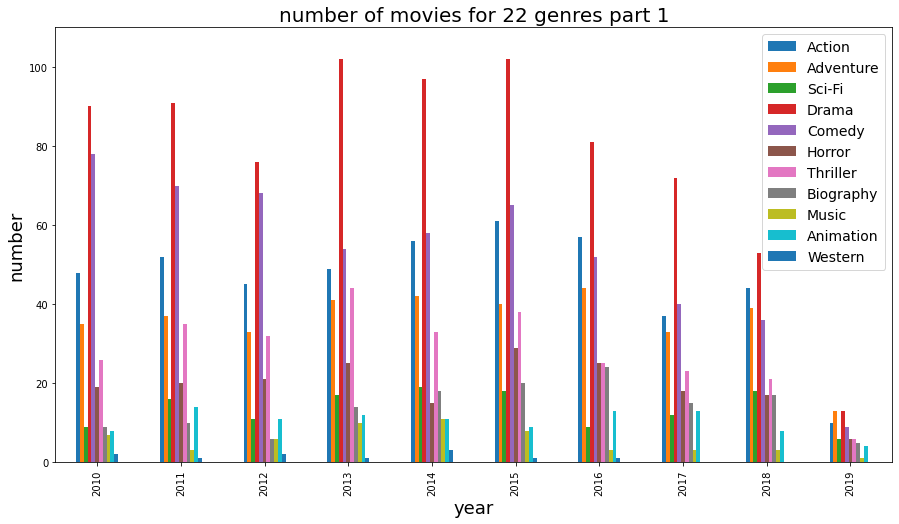

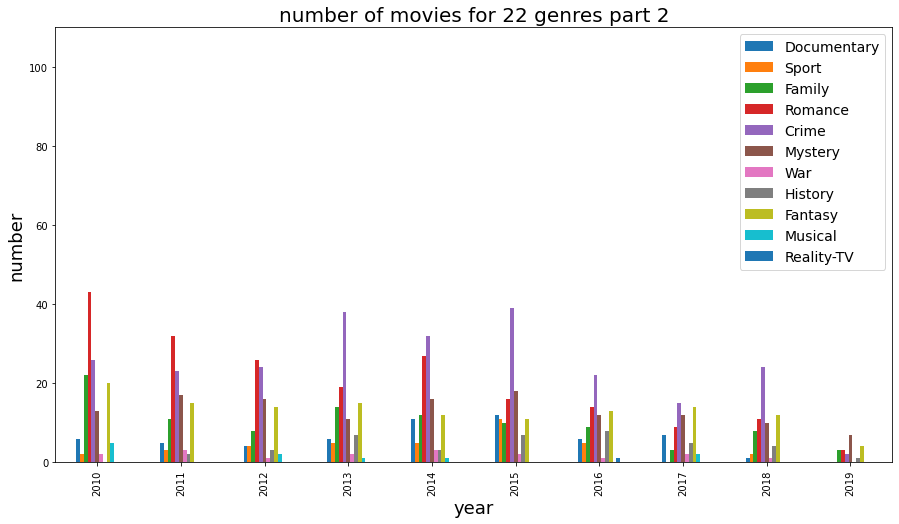

In [218]:
genrestmp  = genresrateyearsum['genres'].unique()
print(genrestmp)
# 1) nomoives
nomoviescols = []
for ii in range(11):
    nomoviescols.append("nomovies_"+genrestmp[ii])
ax = genresrateyearsumtmp.plot( x = "year", y =nomoviescols, kind="bar",figsize=(15,8))
ax.set_ylabel('number',fontsize=18)
ax.set_xlabel('year',fontsize=18)
ax.set_ylim([0,110])
ax.legend(genrestmp[0:11],fontsize=14)
ax.set_title('number of movies for 22 genres part 1',fontsize=20)
nomoviescols = []
for ii in range(11):
    nomoviescols.append("nomovies_"+genrestmp[ii+11])
ax = genresrateyearsumtmp.plot( x = "year", y =nomoviescols, kind="bar",figsize=(15,8))
ax.set_ylabel('number',fontsize=18)
ax.set_xlabel('year',fontsize=18)
ax.set_ylim([0,110])
ax.legend(genrestmp[11:22],fontsize=14)
ax.set_title('number of movies for 22 genres part 2',fontsize=20)

Text(0.5, 1.0, 'Rating: number of movies for selected genres with high numbers')

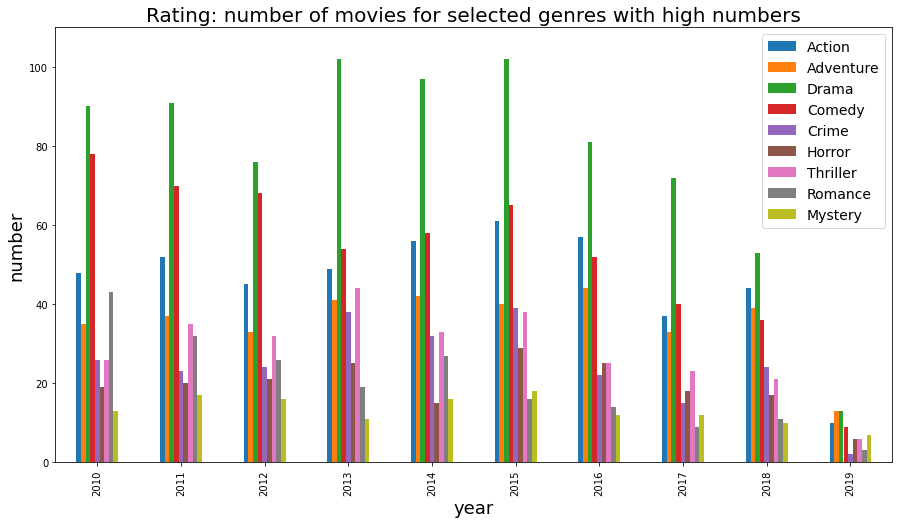

In [219]:
# From above figures for number of movies released each year for different categories,
# 'Action','Adventure','Drama','Comedy','Crime','Horror','Thriller', 'Romance',and 'Mystery',
# have more released, therefore, plot these categories in a single figure
genrestsel = [ 'Action','Adventure','Drama','Comedy','Crime','Horror','Thriller', 'Romance','Mystery']
nomoviescols = []
for ii in range(len(genrestsel)):
    nomoviescols.append("nomovies_"+genrestsel[ii])
ax = genresrateyearsumtmp.plot( x = "year", y =nomoviescols, kind="bar",figsize=(15,8))
ax.set_ylabel('number',fontsize=18)
ax.set_xlabel('year',fontsize=18)
ax.set_ylim([0,110])
ax.legend(genrestsel,fontsize=14)
ax.set_title('Rating: number of movies for selected genres with high numbers',fontsize=20)

From the above figure, Drama, Comedy, Action,Adventure are the top four categories in terms of number of movies released each year between 2010 and 2019

Text(0.5, 1.0, 'Rating: mean of rating for 22 genres part 2')

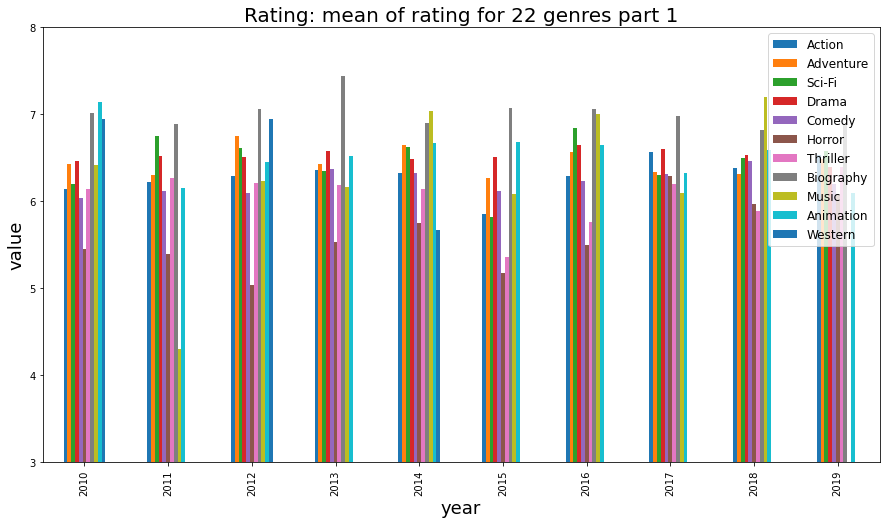

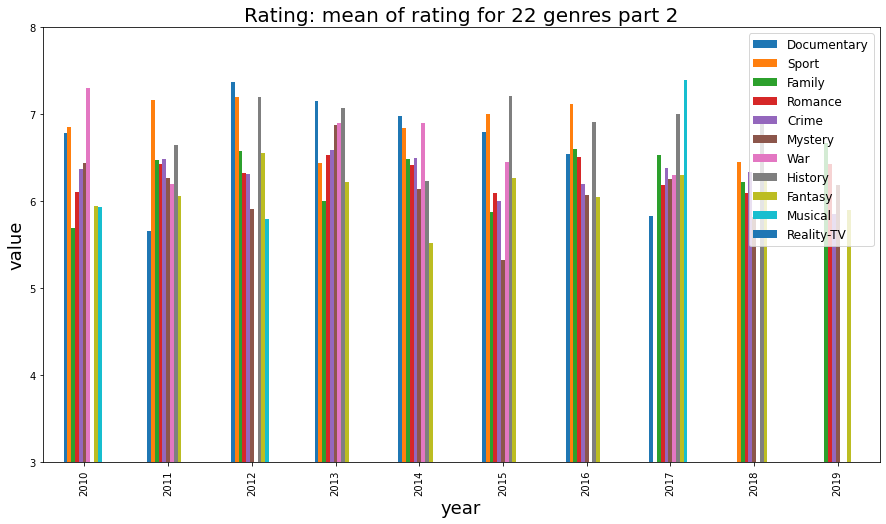

In [222]:
# 2) ratingmean
ratingmeancols = []
for ii in range(11):
    ratingmeancols.append("ratingmean_"+genrestmp[ii])
ax = genresrateyearsumtmp.plot( x = "year", y = ratingmeancols, kind="bar",figsize=(15,8))
ax.set_ylabel('value',fontsize=18)
ax.set_xlabel('year',fontsize=18)
ax.set_ylim([3,8])
ax.legend(genrestmp[0:11],fontsize=12)
ax.set_title('Rating: mean of rating for 22 genres part 1',fontsize=20)

ratingmeancols = []
for ii in range(11):
    ratingmeancols.append("ratingmean_"+genrestmp[ii+11])
ax = genresrateyearsumtmp.plot( x = "year", y = ratingmeancols, kind="bar",figsize=(15,8))
ax.set_ylabel('value',fontsize=18)
ax.set_xlabel('year',fontsize=18)
ax.set_ylim([3,8])
ax.legend(genrestmp[11:22],fontsize=12)
ax.set_title('Rating: mean of rating for 22 genres part 2',fontsize=20)

Text(0.5, 1.0, 'Rating: mean of rating for selected genres with high numbers')

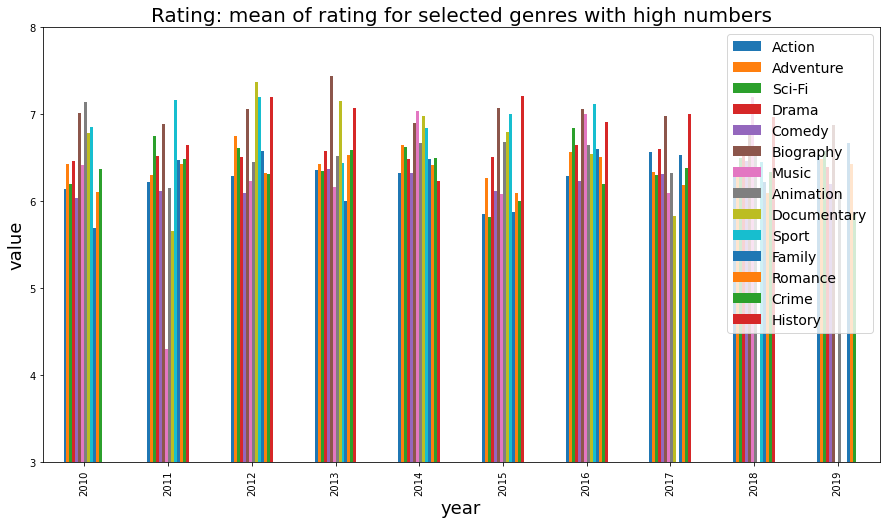

In [223]:
# From above figures for mean rating for each year for different categories,
# 'Action' 'Adventure' 'Sci-Fi' 'Drama' 'Comedy'
# 'Biography' 'Music' 'Animation''Documentary' 'Sport' 'Family','Romance' 'Crime''History'
# have high rating values, therefore, plot these categories in a single figure
genrestsel = ['Action','Adventure','Sci-Fi','Drama','Comedy','Biography','Music','Animation','Documentary','Sport','Family','Romance','Crime','History']
ratingmeancols = []
for ii in range(len(genrestsel)):
    ratingmeancols.append("ratingmean_"+genrestsel[ii])
ax = genresrateyearsumtmp.plot( x = "year", y =ratingmeancols, kind="bar",figsize=(15,8))
ax.set_ylabel('value',fontsize=18)
ax.set_xlabel('year',fontsize=18)
ax.set_ylim([3,8])
ax.legend(genrestsel,fontsize=14)
ax.set_title('Rating: mean of rating for selected genres with high numbers',fontsize=20)

In [256]:
# I also could calculate the mean rating for each category across 2010-2019
genresrategenressum = genresrateyearsum.groupby('genres').mean()
genresrategenressum = genresrategenressum.reset_index()
genresrategenressum = genresrategenressum.sort_values(by='ratingmean', ascending=False)
genresrategenressum = genresrategenressum.reset_index()
genresrategenressum.head(22)

,index,genres,year,nomovies,ratingmean
0,3,Biography,2014.5,13.8,7.014217
1,2,Animation,2014.5,10.3,6.527364
2,7,Drama,2014.5,77.7,6.525539
3,17,Sci-Fi,2014.5,13.5,6.458045
4,1,Adventure,2014.5,35.7,6.453303
5,8,Family,2014.5,10.0,6.313985
6,16,Romance,2014.5,20.0,6.313853
7,5,Crime,2014.5,24.5,6.302245
8,0,Action,2014.5,45.9,6.296745
9,4,Comedy,2014.5,53.0,6.228296


Text(0.5, 1.0, 'Rating: overall mean of ratingmean across 2010-2019 for each genres')

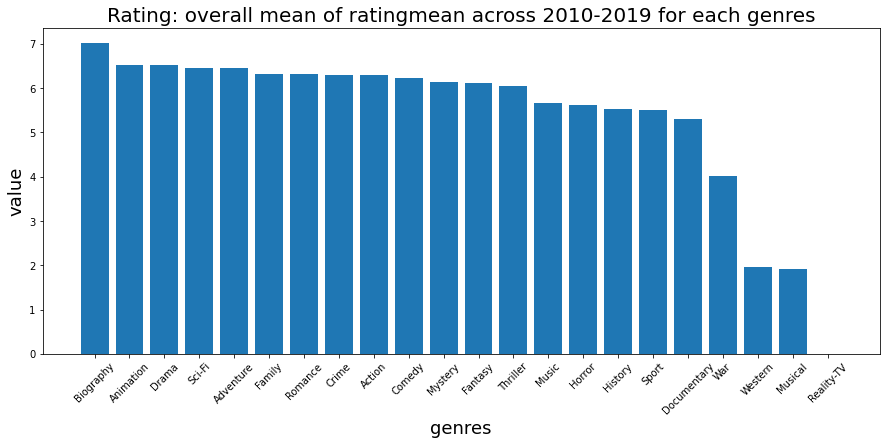

In [258]:
fig, ax = plt.subplots(1,1,figsize=(15,6))
ax.bar(genresrategenressum.index,genresrategenressum.ratingmean)
ax.set_ylabel('value',fontsize=18)
ax.set_xlabel('genres',fontsize=18)
# ax.set_ylim([3,8])
ax.set_xticks(range(22))
# ax.set_xticklabels(['zero','two','four','six'])
ax.set_xticklabels(genresrategenressum['genres'])
plt.xticks(rotation = 45)
ax.set_title('Rating: overall mean of ratingmean across 2010-2019 for each genres',fontsize=20)

# End of Question 3: What types of films have good ratings?

# Answer: Biography, Animation,Drama, Sci-Fi, and Adventure are top five for the rating

# If combined both rating and box office, adventure and action should be invested in the newly found Microsoft studio